# Download the census bureau business data for all years 1993-2014.

In [1]:
import pandas as pd
import numpy as np
import urllib
import zipfile
import os
import sys
import geopandas as gpd
from sklearn.cluster import KMeans
import scipy 
import scipy.cluster as scp
from scipy.cluster.hierarchy import dendrogram, linkage
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [2]:
# make a list of numbers, the datasets in her repo range from 00-14 and 94-99
# files download as: zbp00totals.zip

num1 = list(range(15))
num2 = list(range(94,100))
numset = num1 + num2
numset = pd.Series(numset).astype(str)
numset = numset.str.zfill(2)

In [4]:
census = pd.DataFrame()
for i in numset:
    urllib.request.urlretrieve('https://github.com/fedhere/PUI2018_fb55/blob/master/HW12_fb55/zbp' + i + 'totals.zip?raw=true', 'file.gz')
    !mv file.gz $PUIDATA
    zip_ref = zipfile.ZipFile(os.getenv('PUIDATA') + '/file.gz', 'r')
    zip_ref.extractall(os.getenv('PUIDATA'))
    zip_ref.close()
    read_in = pd.read_csv(os.getenv('PUIDATA') + '/zbp' + i + 'totals.txt', dtype='object')
    read_in['year'] = i # adding a year column since it won't happen otherwise
    census = pd.concat([census, read_in], axis=0)
    

In [5]:
census.head(10)

,AP,EMP,EMPFLAG,EST,NAME,QP1,ZIP,ap,ap_nf,city,...,emp,emp_nf,empflag,est,name,qp1,qp1_nf,stabbr,year,zip
0,0,0,A,1,"HOLTSVILLE, NY",0,00501,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00,NaN
1,259661,8042,NaN,493,"AGAWAM, MA",59833,01001,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00,NaN
2,169658,6547,NaN,563,"AMHERST, MA",36719,01002,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00,NaN
3,2482,82,NaN,13,"AMHERST, MA",308,01003,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00,NaN
4,5826,717,NaN,48,"AMHERST, MA",2049,01004,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00,NaN
5,20413,764,NaN,86,"BARRE, MA",4470,01005,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00,NaN
6,31639,1406,NaN,219,"BELCHERTOWN, MA",7305,01007,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00,NaN
7,3660,221,NaN,21,"BLANDFORD, MA",875,01008,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00,NaN
8,6515,154,NaN,17,"BONDSVILLE, MA",1238,01009,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00,NaN
9,9691,404,NaN,73,"BRIMFIELD, MA",2180,01010,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00,NaN


# Download the NYC zipcodes shapefile

IMPORTANT: Un-comment cellblock below to download shapefile!

In [6]:
# url='https://data.cityofnewyork.us/api/views/i8iw-xf4u/files' +\
# '/YObIR0MbpUVA0EpQzZSq5x55FzKGM2ejSeahdvjqR20?filename=ZIP_CODE_040114.zip'
# urllib.request.urlretrieve(url, "file.gz")
# # unpacking into $PUIDATA
# !unzip file.gz -d $PUIDATA

In [7]:
nyczips = gpd.GeoDataFrame.from_file(os.getenv('PUIDATA') + '/ZIP_CODE_040114.shp')
nyczips.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.251871482 188138.3800067157,..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.712964058 186926.4395172149,..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.275535807 183696.33770971, 1..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.3654508889 183617.6128015518,..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.1134308875 176307.4958601296,..."


# Data Cleaning 

In [8]:
# create a dictionary of values '93':1993, .... '14':2014
values = {'93':1993, '94':1994, '95':1995, '96':1996, '97':1997, '98':1998, '99':1999, '00':2000, '01':2001, 
          '02':2002, '03':2003, '04':2004, '05':2005, '06':2006, '07':2007, '08':2008, '09':2009, '10':2010, 
          '11':2011, '12':2012, '13':2013, '14':2014}

In [9]:
# create year column, mapping dictionary to the column using .map(dictionary_name)
census['year1'] = census['year'].map(values) #had to create new column, wasn't working otherwise
census.year1.value_counts()

1997    40248
1996    40099
1995    39932
2000    39853
2001    39817
1999    39761
2006    39657
2007    39652
2005    39625
2004    39583
1998    39467
2002    39451
2003    39423
1994    39259
2008    39240
2009    39174
2010    39104
2011    39032
2012    38818
2013    38804
2014    38792
Name: year1, dtype: int64

In [10]:
census.columns

Index(['AP', 'EMP', 'EMPFLAG', 'EST', 'NAME', 'QP1', 'ZIP', 'ap', 'ap_nf',
       'city', 'cty_name', 'emp', 'emp_nf', 'empflag', 'est', 'name', 'qp1',
       'qp1_nf', 'stabbr', 'year', 'zip', 'year1'],
      dtype='object')

In [11]:
# because of duplicates in ZIP and zip, use ZIP to fillna for zip csb.ZIP = csb.ZIP.fillna(csb.zip)
# we're dropping all other columns, so we don't need to fillna the other duplicates

census['EST1'] = census.EST # created new column because it wasn't working on original column
census['ZIP1'] = census.ZIP 

census['EST1'] = census['EST1'].fillna(census['est'])
census['ZIP1'] = census['ZIP1'].fillna(census['zip'])

In [12]:
# drop all but ZIP EST and year from census data set

census2 = census[['ZIP1', 'EST1', 'year1']]

In [13]:
# convert est to int

census2['EST1'] = census2['EST1'].astype(int)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [14]:
# unstack years to make them become rows
census_group = census2.groupby(['ZIP1', 'year1'])['EST1'].sum().unstack().reset_index()
census_group

year1,ZIP1,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,00501,NaN,2.0,4.0,4.0,3.0,2.0,1.0,6.0,11.0,...,2.0,8.0,5.0,3.0,2.0,2.0,2.0,2.0,2.0,4.0
1,01000,NaN,4.0,11.0,8.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01001,439.0,439.0,433.0,457.0,444.0,469.0,493.0,490.0,490.0,...,509.0,509.0,503.0,477.0,458.0,448.0,436.0,453.0,439.0,458.0
3,01002,450.0,467.0,487.0,500.0,490.0,558.0,563.0,587.0,566.0,...,589.0,582.0,596.0,584.0,571.0,570.0,558.0,572.0,572.0,560.0
4,01003,10.0,10.0,13.0,15.0,14.0,13.0,13.0,13.0,15.0,...,12.0,12.0,16.0,17.0,16.0,16.0,16.0,15.0,15.0,18.0
5,01004,47.0,48.0,47.0,41.0,31.0,35.0,48.0,37.0,23.0,...,31.0,30.0,20.0,18.0,18.0,21.0,19.0,16.0,16.0,13.0
6,01005,92.0,95.0,101.0,104.0,95.0,82.0,86.0,90.0,94.0,...,94.0,98.0,106.0,97.0,87.0,96.0,91.0,94.0,97.0,97.0
7,01007,182.0,172.0,183.0,183.0,183.0,194.0,219.0,228.0,212.0,...,225.0,238.0,243.0,246.0,230.0,238.0,217.0,217.0,221.0,226.0
8,01008,18.0,19.0,14.0,17.0,18.0,18.0,21.0,27.0,28.0,...,19.0,18.0,18.0,16.0,20.0,21.0,20.0,18.0,18.0,18.0
9,01009,14.0,16.0,15.0,18.0,17.0,14.0,17.0,20.0,19.0,...,22.0,21.0,18.0,19.0,18.0,15.0,14.0,16.0,16.0,17.0


# Merging the two dfs 

In [15]:
both = pd.merge(nyczips, census_group, left_on='ZIPCODE', right_on='ZIP1')
both.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,...,82.0,80.0,84.0,90.0,92.0,98.0,101.0,95.0,99.0,109.0
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,...,556.0,565.0,556.0,592.0,621.0,675.0,674.0,726.0,755.0,772.0
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,...,587.0,570.0,587.0,602.0,647.0,699.0,713.0,721.0,731.0,752.0
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,...,491.0,499.0,514.0,520.0,543.0,580.0,597.0,623.0,673.0,696.0
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,...,1332.0,1331.0,1377.0,1397.0,1457.0,1474.0,1523.0,1605.0,1687.0,1736.0


In [16]:
# turn zipcode into float
both['ZIP1'] = both['ZIP1'].astype(float)

In [17]:
# clean the data set and set zipcode as the axis
both.index = both['ZIP1']
both.drop(['ZIP1'], axis=1, inplace=True)

In [18]:
# drop na values
census_dropped = both.dropna(axis=0, how='any')

In [19]:
census_dropped.drop(['ZIPCODE', 'BLDGZIP', 'PO_NAME', 'POPULATION', 'AREA', 'STATE', 'COUNTY', 'ST_FIPS', 'CTY_FIPS', 
                     'URL', 'SHAPE_AREA', 'SHAPE_LEN', 'geometry'], axis=1, inplace=True)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [20]:
#then the standardization will look like:
vals = ((census_dropped.T - census_dropped.mean(1)) / census_dropped.std(1)).T

- Uncomment code below to check if data standardization worked (it does) 

In [21]:
# print(vals.mean(axis=1)) #should return 0 (or something very small) everywhere
# print(vals.mean(axis=1).shape) #should be (260,)
# vals.std(axis=1) #should return 1 everywhere
# vals.std(axis=1).shape

At 2 cluster, inertia is 1549.920444861035
At 3 cluster, inertia is 1344.683388124492
At 4 cluster, inertia is 1171.0024212331177
At 5 cluster, inertia is 1063.2960070388872
At 6 cluster, inertia is 985.8534963258212
At 7 cluster, inertia is 923.5745196974552
At 8 cluster, inertia is 880.1353725721478
At 9 cluster, inertia is 835.4841837006094


Text(0.5,1,'finding the elbow!')

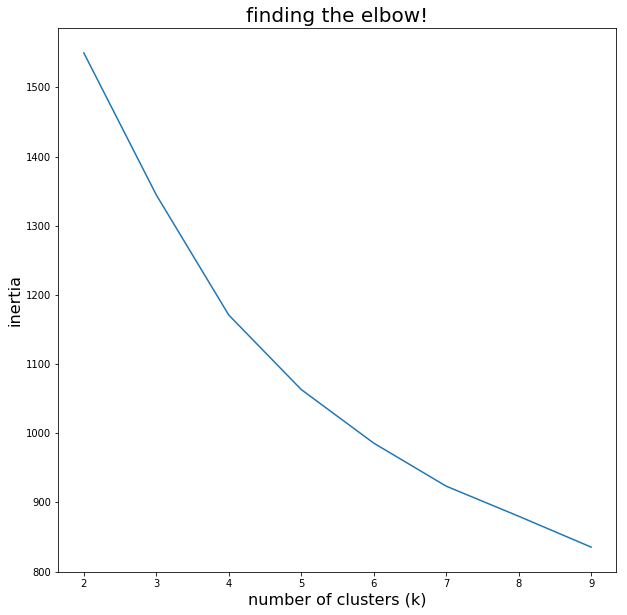

In [35]:
# got code from Nathan Caplan, who was helped by Andrew Hill
s = np.zeros(8)
for k in range(0,8):
    est = KMeans(n_clusters = k + 2, n_init = 100)
    est.fit(vals)
    s[k] = est.inertia_
    print('At {0} cluster, inertia is {1}'.format(k+2, s[k]))
    
plt.figure(figsize(10,10))
plt.plot(range(2,10), s, '-')
plt.xlabel('number of clusters (k)', fontsize=16)
plt.ylabel('inertia', fontsize=16)
plt.title('finding the elbow!', fontsize=20)

Figure 1: Examining the inertia curve as we increase our number of clusters 'k'. In the graph, we're looking for the 'elbow' or where we observe the sharpest change. While a subjective measure, this is one way to choose how many clusters to use. From my perspective, the elbow occurs at k=4, so I will use k=4 in my cluster analysis below. 

In [36]:
#cluster with kmeans
km = KMeans(n_clusters=4, random_state=1213).fit(vals)
km.labels_.shape

(243,)

In [37]:
census_dropped['labels'] = km.labels_

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [38]:
census_dropped.head()

,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,labels
ZIP1,,,,,,,,,,,,,,,,,,,,,
11436.0,51.0,50.0,53.0,51.0,51.0,58.0,65.0,57.0,78.0,74.0,...,80.0,84.0,90.0,92.0,98.0,101.0,95.0,99.0,109.0,0
11213.0,406.0,420.0,433.0,456.0,476.0,473.0,477.0,493.0,546.0,569.0,...,565.0,556.0,592.0,621.0,675.0,674.0,726.0,755.0,772.0,0
11212.0,505.0,494.0,502.0,527.0,519.0,541.0,520.0,527.0,577.0,581.0,...,570.0,587.0,602.0,647.0,699.0,713.0,721.0,731.0,752.0,0
11225.0,381.0,387.0,388.0,410.0,416.0,409.0,417.0,422.0,479.0,488.0,...,499.0,514.0,520.0,543.0,580.0,597.0,623.0,673.0,696.0,0
11218.0,985.0,1015.0,1049.0,1075.0,1118.0,1149.0,1161.0,1180.0,1228.0,1247.0,...,1331.0,1377.0,1397.0,1457.0,1474.0,1523.0,1605.0,1687.0,1736.0,0


In [39]:
census_dropped['labels'].value_counts()

0    178
1     31
3     17
2     17
Name: labels, dtype: int64

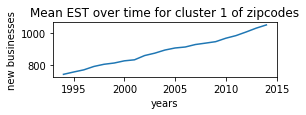

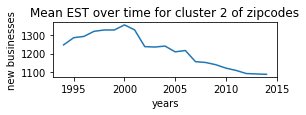

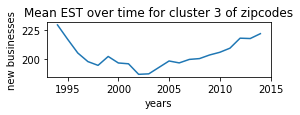

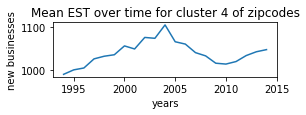

In [45]:
# plotting each of the average EST per each of the clustered zipcodes over time
for i in range(4):
    fig = plt.figure(figsize=(4,1))
    ax = fig.add_subplot(111)
    grp = census_dropped[census_dropped['labels'] == i]
    grp = grp.drop(['labels'], axis=1)
    ax.plot(grp.mean(axis=0), '-')
    ax.set_xlabel('years')
    ax.set_ylabel('new businesses')
    ax.set_title('Mean EST over time for cluster {} of zipcodes'.format(i+1, range(4)))

Figure 2: Observing the change in business growth (as measured by the variable EST, number of new business establishments) from 1993 to 2014. Data are from the 1993-2014 American Community Survey. 

# Resetting index

In [28]:
census_reset = census_dropped.reset_index()
census_reset.head()

,ZIP1,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,labels
0,11436.0,51.0,50.0,53.0,51.0,51.0,58.0,65.0,57.0,78.0,...,80.0,84.0,90.0,92.0,98.0,101.0,95.0,99.0,109.0,0
1,11213.0,406.0,420.0,433.0,456.0,476.0,473.0,477.0,493.0,546.0,...,565.0,556.0,592.0,621.0,675.0,674.0,726.0,755.0,772.0,0
2,11212.0,505.0,494.0,502.0,527.0,519.0,541.0,520.0,527.0,577.0,...,570.0,587.0,602.0,647.0,699.0,713.0,721.0,731.0,752.0,0
3,11225.0,381.0,387.0,388.0,410.0,416.0,409.0,417.0,422.0,479.0,...,499.0,514.0,520.0,543.0,580.0,597.0,623.0,673.0,696.0,0
4,11218.0,985.0,1015.0,1049.0,1075.0,1118.0,1149.0,1161.0,1180.0,1228.0,...,1331.0,1377.0,1397.0,1457.0,1474.0,1523.0,1605.0,1687.0,1736.0,0


In [29]:
nyczips.ZIPCODE = nyczips.ZIPCODE.astype(float)

In [30]:
# merge with cluster data
est_merge = nyczips.merge(census_reset, left_on='ZIPCODE', right_on='ZIP1')

In [31]:
est_merge.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,labels
0,11436.0,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,...,80.0,84.0,90.0,92.0,98.0,101.0,95.0,99.0,109.0,0
1,11213.0,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,...,565.0,556.0,592.0,621.0,675.0,674.0,726.0,755.0,772.0,0
2,11212.0,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,...,570.0,587.0,602.0,647.0,699.0,713.0,721.0,731.0,752.0,0
3,11225.0,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,...,499.0,514.0,520.0,543.0,580.0,597.0,623.0,673.0,696.0,0
4,11218.0,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,...,1331.0,1377.0,1397.0,1457.0,1474.0,1523.0,1605.0,1687.0,1736.0,0


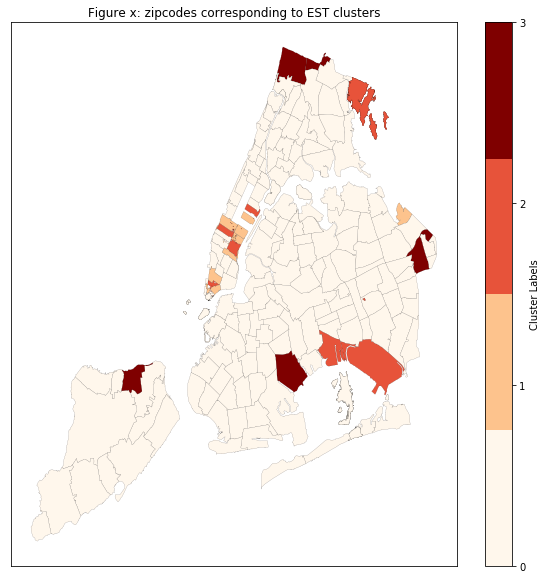

In [32]:
# plotting zipcodes with the different cluster

f, ax = plt.subplots(figsize=(10,10))
cmap = plt.cm.get_cmap('OrRd', 4)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
base = est_merge.plot(column='labels', edgecolor='k', cmap=cmap, alpha=1, linewidth=0.1, ax=ax, legend=False)
ax.set_title('Figure 3: zipcodes corresponding to new business clusters')
norm = mpl.colors.Normalize(vmin=0, vmax=3)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cb = plt.colorbar(sm, ticks = np.linspace(0,4,5))
cb.set_label('Cluster Labels')

Figure 3: A choropleth of cluster centers for 4 k-means clusters of business patterns (measured by number of new businesses) at the zipcode level in NYC. Each color corresponds to a cluster. 

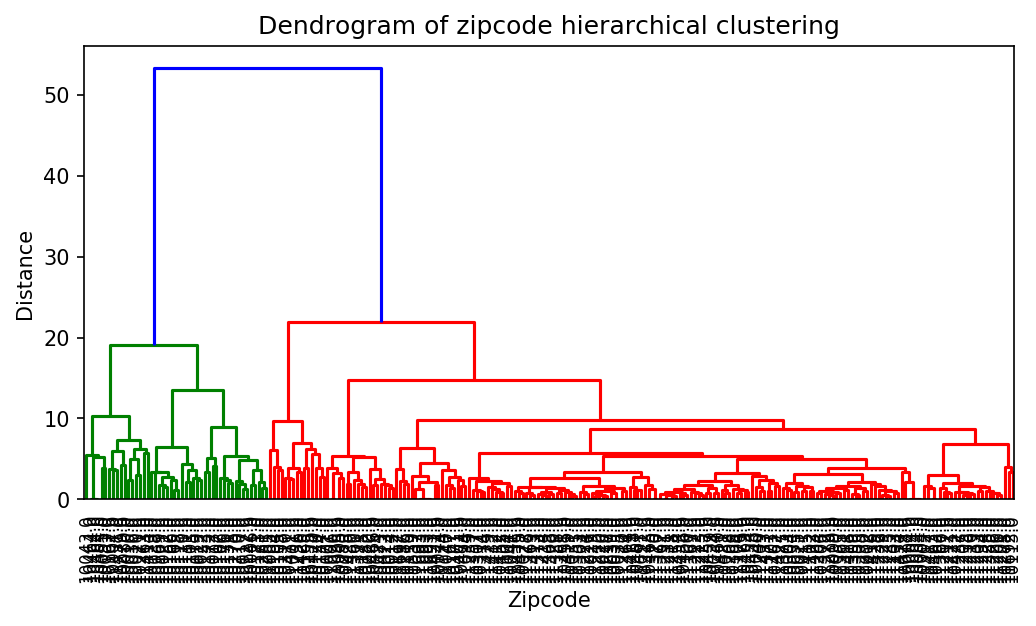

In [33]:
fig = plt.figure(figsize=(8,4), dpi=150)
plt.xlabel('Zipcode')
plt.ylabel('Distance')
plt.title('Dendrogram of zipcode hierarchical clustering')
ddg = scp.hierarchy.dendrogram(scp.hierarchy.linkage(vals, method='ward'), labels=census_dropped.index,
                             leaf_rotation=90, leaf_font_size=8)

Figure 4: Dendrogram of clusters of new business growth in NYC showing two main branches, red and green. In this example, the joining of two clusters is represented by the fusion of two vertical lines, connected by a horizontal line. There are about 10 zipcodes that seem to be much further than the collection of clusters on the bottom of the graph, but as we have so many zipcodes, it is hard to distinguish which zipcodes those are. 